In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
from pandas import *
import csv 
import warnings


In [2]:
#READING CSV FILES AND CREATING TRAINING/TEST DATA SETS

def num_rows_and_cols(filename):
    cur_file = open(filename,newline='')
    raw_data = csv.reader(cur_file)
    num_rows = 0 
    num_cols = 0 
    is_num_cols_known = 0
    for rows in raw_data:
        if is_num_cols_known == 0:
            for element in rows:
                num_cols += 1
            is_num_cols_known = 1 
        num_rows += 1
    cur_file.close()
    return num_rows,num_cols


def read_file(filename):
    Y = []
    X = []
    Y_training = [] 
    Y_test = []
    X_training = [] 
    X_test = []
    num_rows,num_columns = num_rows_and_cols(filename)
    num_cities = num_columns-1 
    for i in range(1,num_cities+1): 
        empty_list = [];
        X.append(empty_list)
    with open(filename,newline='') as cur_file: 
        raw_data = csv.reader(cur_file)
        for rows in raw_data:
            Y.append(float(rows[0]))
            for i in range(1,num_cities+1):
                X[i-1].append(float(rows[i]))
    return X,Y



X,Y = read_file("data1.csv")
x1 = X
X,Y = read_file("data2.csv")
x2 = X
X,Y = read_file("data3.csv")
x3 = X
x_combined = np.vstack((x1,x2,x3))
year = Y

Y_training = []
Y_test = []
for i in range(0, 10):
    Y_test.append(float(Y[i]))
for i in range(10, 30):
    Y_training.append(float(Y[i]))

def x_sets(z):
    X_training = []
    X_test = []
    X = x_combined[z]
    for i in range(0, 10):
        X_test.append(float(X[i]))
    for i in range(10, 30):
        X_training.append(float(X[i]))
    return X_training, X_test
    

X_training, X_test = x_sets(0)
alameda_training = X_training
alameda_test = X_test
X_training, X_test = x_sets(1)
sanmateo_training = X_training
sanmateo_test = X_test
X_training, X_test = x_sets(2)
losangeles_training = X_training
losangeles_test = X_test
X_training, X_test = x_sets(3)
merced_training = X_training
merced_test = X_test
X_training, X_test = x_sets(4)
santaclara_training = X_training
santaclara_test = X_test
X_training, X_test = x_sets(5)
riverside_training = X_training
riverside_test = X_test
X_training, X_test = x_sets(6)
sandiego_training = X_training
sandiego_test = X_test
X_training, X_test = x_sets(7)
santabarbara_training = X_training
santabarbara_test = X_test
X_training, X_test = x_sets(8)
santacruz_training = X_training
santacruz_test = X_test

x_training = np.vstack((alameda_training,sanmateo_training,losangeles_training,merced_training,santaclara_training,riverside_training,sandiego_training,santabarbara_training,santacruz_training))
# generate test stacked vectors
x_test = np.vstack((alameda_test,sanmateo_test,losangeles_test,merced_test,santaclara_test,riverside_test,sandiego_test,santabarbara_test,santacruz_test))

Best loss for city 1 is 0.0201818201320551 achieved on polynomial of degree 0.


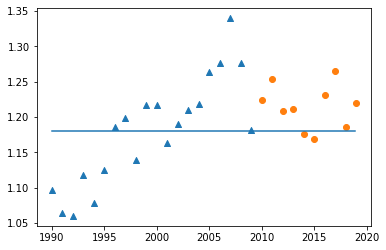

Best loss for city 2 is 0.002962581692573554 achieved on polynomial of degree 0.


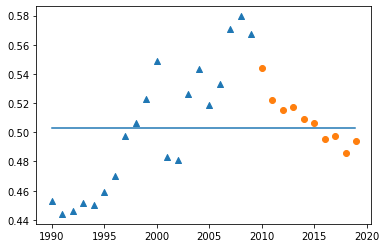

Best loss for city 3 is 0.4713731065451134 achieved on polynomial of degree 0.


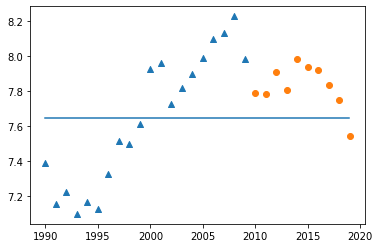

Best loss for city 4 is 0.011541154465973572 achieved on polynomial of degree 1.


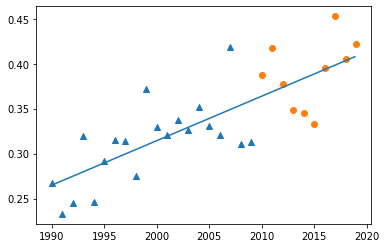

Best loss for city 5 is 0.0076897455961454685 achieved on polynomial of degree 2.


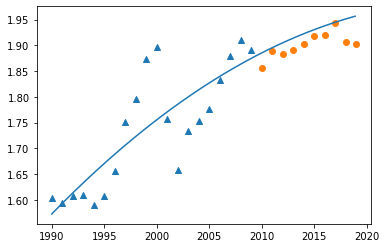

Best loss for city 6 is 0.6101282200992125 achieved on polynomial of degree 3.


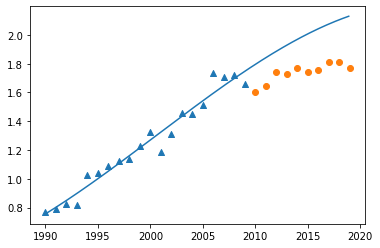

Best loss for city 7 is 0.19048510320648893 achieved on polynomial of degree 3.


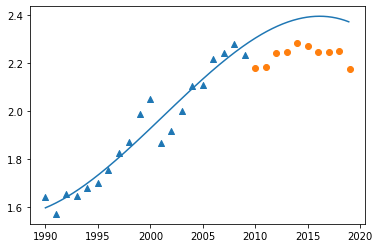

Best loss for city 8 is 0.0024038342047828813 achieved on polynomial of degree 3.


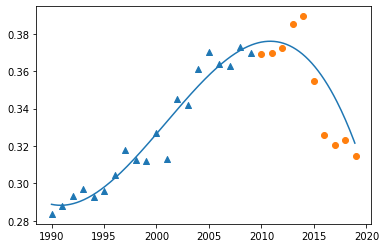

Best loss for city 9 is 0.0021917743407288202 achieved on polynomial of degree 4.


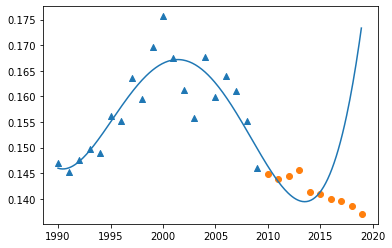

In [3]:
# this function fits polynomial of given degree to data
def polynomial_regression(xtrain,ytrain,degree):
    x = np.array(xtrain)
    y = np.array(ytrain)
    coeff = np.polyfit(x,y,degree)
    return coeff

# this function takes training and test data, and returns optimal loss alongside coefficients of best-fit polynomial
def validation_loss(xtrain,ytrain,xtest,ytest): 
    max_degree = len(xtrain)-1
    for deg in range(max_degree+1):
        cur_coeff = polynomial_regression(xtrain,ytrain,deg)
        y_pred = np.polyval(cur_coeff,xtest)
        cur_val_loss = 0
        for j in range(len(xtest)):
            cur_val_loss += (y_pred[j]-ytest[j])**2
        if deg == 0:
            best_val_loss = cur_val_loss
            best_deg = deg
            best_coeff = cur_coeff
        else:
            if cur_val_loss < best_val_loss:
                best_val_loss = cur_val_loss
                best_deg = deg
                best_coeff = cur_coeff
    return best_deg,best_val_loss,best_coeff

# disable RankWarning from np.polyfit using the following line of code
warnings.simplefilter('ignore', np.RankWarning)

for city_index in range(9): # for each of the 9 cities
    xtrain = Y_training
    xtest = Y_test
    ytrain = x_training[city_index]
    ytest = x_test[city_index]
    b_deg,b_val_loss,b_coeff = validation_loss(xtrain,ytrain,xtest,ytest)
    print('Best loss for city '+str(city_index+1)+' is '+str(b_val_loss)+' achieved on polynomial of degree '+str(b_deg)+'.')
    coeff = polynomial_regression(xtrain, ytrain, b_deg)
    # plt.plot(coeff)
    # plt.show()
    # ^ don't plot the coefficients, plot the actual polynomial, test set and training set - shourya
    # get the polynomial data points using np.polyval and np.arange as follows.
    dense_x_points = np.arange(1990,2019,0.1) # generate points between 1990 and 2019 with spacing of 0.1
    poly_y_points = np.polyval(coeff,dense_x_points) # evaluate the polynomial described by coeff at dense_x_points
    plt.plot(dense_x_points,poly_y_points)
    # plot training set
    plt.scatter(xtrain,ytrain,marker='^')
    # plot test set
    plt.scatter(xtest,ytest,marker='o')
    plt.show()

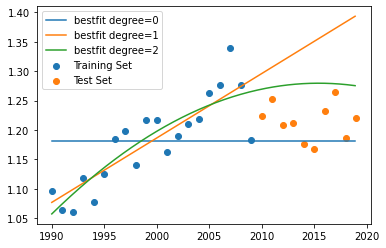

In [4]:
# city 1 has lowest validation loss for degree 0. Let's plot degree 0 1 and 2 best-fit polynomials

xtrain = Y_training
xtest = Y_test
ytrain = x_training[0]
ytest = x_test[0]

coeff_deg_0 = np.polyfit(xtrain,ytrain,0)
coeff_deg_1 = np.polyfit(xtrain,ytrain,1)
coeff_deg_2 = np.polyfit(xtrain,ytrain,2)

x_dense = np.arange(1990,2019,0.1)
y_deg_0 = np.polyval(coeff_deg_0,x_dense)
y_deg_1 = np.polyval(coeff_deg_1,x_dense)
y_deg_2 = np.polyval(coeff_deg_2,x_dense)

# plot all the stuff
plt.scatter(xtrain,ytrain,label='Training Set')
plt.scatter(xtest,ytest,label='Test Set')
plt.plot(x_dense,y_deg_0,label='bestfit degree=0')
plt.plot(x_dense,y_deg_1,label='bestfit degree=1')
plt.plot(x_dense,y_deg_2,label='bestfit degree=2')
# enable legend
plt.legend()

In [5]:
# #VALIDATION LOSS
    
# def polynomial_regression(Y_training, data_seq_1, degree):
#     x = np.array(Y_training)
#     y = np.array(data_seq_1)
#     coeff = np.polyfit(x,y,degree)
#     polynomial = np.polyval(coeff,x)
#     return polynomial
    
    
# def validation_loss(data_seq_1, polynomial):
#     val_loss = 0
#     for k in range(len(polynomial)):
#         y_difference = abs(data_seq_1[k] - polynomial[k])
#         val_loss += y_difference
#     if val_loss < lowest_validation_loss:
#         lowest_validation_loss = []
#         best_degree = []
#         lowest_validation_loss.append(val_loss)
#         best_degree.append(j)
#     return lowest_validation_loss


# for i in x_training:
#     poly = []
#     lowest_validation_loss = []
#     linear = polynomial_regression(Y_training, i, 1)
#     val_loss_linear = 0
#     for k in range(len(linear)):
#         y_difference = abs(i[k] - linear[k])
#         val_loss_linear += y_difference
#     lowest_validation_loss.append(val_loss_linear)
#     deg = np.array(range(1, len(Y_training)-1))
#     for j in deg:
#         polynomial = polynomial_regression(Y_training, i, j)
#         validation_loss(i, polynomial)
    